In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
plt.rcParams["figure.figsize"] = [18, 12]

In [ ]:
# @title
from graphviz import Source
from IPython.core.magic import register_cell_magic
@register_cell_magic
def graph(line, cell):
  src = "digraph {%s}" % cell
  g = Source(src)
  if line:
    name = line.split()[0]
    globals()[name] = g
  else:
    return g

##Flow-Chart

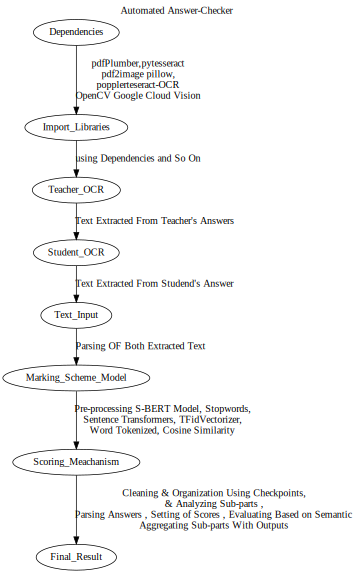

In [ ]:
# @title
%%graph
# digraph ice_cream_swim {
    size = "8!, 8!"
    graph [label = "Automated Answer-Checker" labelloc = top]
    Dependencies -> Import_Libraries[label = "pdfPlumber,pytesseract \n pdf2image pillow,\n popplerteseract-OCR \n OpenCV Google Cloud Vision" ]

    Import_Libraries -> Teacher_OCR[label = "using Dependencies and So On"]
    Teacher_OCR -> Student_OCR[label = "Text Extracted From Teacher's Answers"]
    Student_OCR -> Text_Input[label = "Text Extracted From Studend's Answer "]
    Text_Input -> Marking_Scheme_Model[label = "Parsing OF Both Extracted Text "]
    Marking_Scheme_Model->Scoring_Meachanism[label = "Pre-processing S-BERT Model, Stopwords,\n Sentence Transformers, TFidVectorizer, \n Word Tokenized, Cosine Similarity "]
    Scoring_Meachanism -> Final_Result[label = "Cleaning & Organization Using Checkpoints, \n & Analyzing Sub-parts ,\n Parsing Answers , Setting of Scores , Evaluating Based on Semantic \n Aggregating Sub-parts With Outputs "]
# }

##Dependecies


---





In [ ]:
!pip install pdfplumber pytesseract pdf2image pillow
!apt-get install -y poppler-utils
!sudo apt install tesseract-ocr
!pip install opencv-python
!pip install google-cloud-vision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 88.1 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 3.4.8
    Uninstalling cryptography-3.4.8:
      Successfully uninstalled cryptography-3.4.8
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/u

## Importing libraries

---



In [ ]:
import pdfplumber
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
import re
import cv2
import json
from google.cloud import vision
import os
import numpy as np
import torch
# from sentence_transformers import SentenceTransformer, util
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from fuzzywuzzy import fuzz
# Ensuring NLTK data is downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', download_dir='/root/nltk_data')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', download_dir='/root/nltk_data')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', download_dir='/root/nltk_data')

# Set NLTK data path
nltk.data.path.append('/root/nltk_data')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## $ Teacher$ $Answer$ $OCR$

---



In [ ]:
# Set Tesseract path
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

def extract_text_from_pdf(pdf_path):
    text = ""

    # Try extracting text using pdfplumber (for digital PDFs)
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            extracted = page.extract_text()
            if extracted:
                text += extracted + "\n"

    # If pdfplumber fails, use OCR
    if not text.strip():
        images = convert_from_path(pdf_path, dpi=300)
        for image in images:
            text += pytesseract.image_to_string(image, lang="eng") + "\n"

    return text

# Extract text and store it in a variable for the marking scheme model
pdf_path = "/content/view_marking_scheme_removed.pdf"
teacher_answer = extract_text_from_pdf(pdf_path)
# Save extracted text to a .txt file
output_txt_path = "teacher_answer.txt"
with open(output_txt_path, "w", encoding="utf-8") as f:
    f.write(teacher_answer)

# The extracted text can now be used as input for the marking scheme model
print(teacher_answer)  # Check output


Solutions
Paper 2: Business Laws, Foundation

January 2625 examinations

tics aggrecan la eich cts net acti ne Sica
Common Notes:

|

1. While awarding of marks, citing of Sections may not form part of |
the answer. |
2. Citing of relevant aspect of the section with correct answers may |
be taken into consideration as an adequate answer, rather than the |

entire sections. |

3. Citing of case laws, if any, may not form part of answer while |
awarding of marks. |

}

4. Specific notes given with answers, if any, may be taken into
consideration while awarding of marks.

 

ss —

Answer I(a)

consent, lawful consideration, and a lawful object.

In the instant case, the agreement to pay =10,000 in exchange for a service (providing

(i) Under Section 10 of the Indian Contract Act, 1872, a valid contract requires free
Step |
information about prospective grooms) is lawful.

Hence, the agreement is valid.

—

(ii) According to section 20, where both the parties to an agreement are under a mi

## $Student$ $Answer$ $OCR$

---







In [ ]:
# Set Google Cloud credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/prefab-builder-452209-f8-ca411802c1fb.json"

# Function to preprocess image
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
    return binary

# Function to perform OCR using Google Cloud Vision
def ocr_with_google_vision(image_path):
    client = vision.ImageAnnotatorClient()
    with open(image_path, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content=content)
    response = client.text_detection(image=image)
    texts = response.text_annotations
    return texts[0].description if texts else ""

# Function to extract and structure text
def extract_and_structure_text(pdf_path):
    images = convert_from_path(pdf_path)
    structured_data = {}
    full_text = []  # Stores extracted text for all pages

    for i, image in enumerate(images):
        image_path = f"page_{i+1}.png"
        image.save(image_path, 'PNG')
        preprocessed_image = preprocess_image(cv2.imread(image_path))
        text = ocr_with_google_vision(image_path)
        full_text.append(text)  # Store text for each page

        print(f"--- Extracted Text from Page {i+1} ---\n{text}\n")

        # Extract question numbers, sub-parts, and marks using regex
        questions = re.findall(r'(\d+[a-z]*)\.\s*(.*?)\s*\((\d+)\)', text)
        for question in questions:
            q_num, q_text, marks = question
            if q_num not in structured_data:
                structured_data[q_num] = []
            structured_data[q_num].append({"text": q_text, "marks": int(marks)})

    return structured_data, full_text

# Path to the PDF file
pdf_path = "/content/view_ans_sheet9 (1).pdf"

# Extract and structure text
student_answer, full_text = extract_and_structure_text(pdf_path)

# Store text starting from page 3 onwards
student_answer_page3 = "\n".join(full_text[2:])  # Pages are 0-indexed, so page 3 is index 2

# Save extracted text from page 3 onwards to a .txt file
output_txt_path = "student_answer_page3.txt"
with open(output_txt_path, "w", encoding="utf-8") as f:
    f.write(student_answer_page3)

# Print output (optional)
print("Structured Data for Student Answer:", student_answer)
# # Save structured data to JSON
# with open("structured_answers.json", "w") as json_file:
#     json.dump(structured_data, json_file, indent=4)

# print("Structured data saved to structured_answers.json")

--- Extracted Text from Page 1 ---
GRAPH PAPER IS ON THE
PENULTIMATE PAGE
Book No. 1 (containing 28 pages)
THE INSTITUTE OF CHARTERED
ACCOUNTANTS OF INDIA
Foundation
Group No....I
Paper No.........
2
Examination
Subject Business Law.
Number of Answer Books used: Main +
Date Seal
116 JAN 2025
additional sheets
For neo by ICAL only
FDN-P02-09
Paper Code
IH IN THIS CIRCLE
TH
OF CHARTERED
THE INSTITUTE
ACCOUNTANTS OFNDIA
JANUARY,
SIH NI HUM
ICA
B
E
H I J K MN
P
R
W
(x)
Z
HIJKLMN
R
S
T
W
X Y Z
B
E
F
H
KLM
O
R
S
W
1
MCQ Booklet Serial No. Paper No.
Level of Exam
Foundation
1 Intermediate (2)
Final 3
MCQ Answers
0
(0)
1
1
1 1 1 1
2
2
2 2 (2)
2 2
(2
3
3
(3) 3
(3 3
4
1234
A B C D
11
A
B
21
A
B
A B
12
B
22
B
D
A B
13
B
23
B
B
14
A
B
24
A B
4
4
5
5
C
15
A B
25
A B
5
(5 5 5
5 5
5
69
B
16
A B
26
A B
6
6 6 6
6
6
7
7 7 7
7
78
A
B
17
A B
27
A B
(B
18
(A (B)
28
(A) B
8
8
8
8 (8) (8
9 A
B
19
A
B
(9 (9 9
10
A
20
A
B
29
29
A B
30
A
B
•

--- Extracted Text from Page 2 ---
ATE
ne cover
e OMR portion
appropr

## $LLM$ $with$ $Marking$ $Scheme$

---



In [ ]:
import os
import re
import json
import spacy
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer, util
from openai import OpenAI

class AnswerEvaluationSystem:


    def _extract_answer_for_question(self, answers_text, question_key):
        """
        Extract answer for a specific question from the full text.
        :param answers_text: Full answers text
        :param question_key: Key of the specific question
        :return: Answer text for the specific question
        """
        try:
            # Normalize question key to handle potential spacing inconsistencies
            normalized_key = re.sub(r'\s+', '', question_key)

            # Try multiple pattern formats to increase robustness
            patterns = [
                rf'{re.escape(normalized_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'{re.escape(question_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'Answer\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nAnswer|$)',
                rf'SOLUTION\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nSOLUTION|$)',
                rf'ANSWER\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nANSWER|$)',
                rf'Sol\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nSol|$)',
                rf'Ans\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nAns|$)',
                rf'sol\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nsol|$)',
                rf'ans\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nans|$)'
            ]

            for pattern in patterns:
                match = re.search(pattern, answers_text, re.DOTALL | re.MULTILINE)
                if match:
                    return match.group(1).strip()

            # If no match found, return the full text as fallback
            return answers_text

        except Exception as e:
            print(f"Error extracting answer for {question_key}: {e}")
            return answers_text

    def __init__(self, openai_api_key):
        """
        Initialize the answer evaluation system with necessary models and configurations.
        :param openai_api_key: OpenAI API key for GPT processing
        """
        # Initialize models and utilities
        self.sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
        # Load spaCy and NLTK resources
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except OSError:
            print("Downloading spaCy English model...")
            spacy.cli.download("en_core_web_sm")
            self.nlp = spacy.load("en_core_web_sm")
        # Download NLTK resources
        nltk.download('stopwords', quiet=True)
        nltk.download('punkt', quiet=True)
        self.stop_words = set(nltk.corpus.stopwords.words('english'))
        # Initialize OpenAI client
        self.client = OpenAI(api_key=openai_api_key)
        # Storage for structured data
        self.structured_question_paper = {}

    def preprocess_text(self, text):
        """
        Tokenizes and removes stop words from text.
        :param text: Input text to preprocess
        :return: Preprocessed text
        """
        words = nltk.word_tokenize(text)
        return " ".join([word for word in words if word.lower() not in self.stop_words and word.isalnum()])

    def chunk_text(self, text, max_tokens=3000):
        """
        Splits text into smaller chunks to avoid exceeding token limits.
        :param text: Text to chunk
        :param max_tokens: Maximum tokens per chunk
        :return: List of text chunks
        """
        sentences = text.split('. ')
        chunks, current_chunk = [], ""
        for sentence in sentences:
            if len(current_chunk) + len(sentence) < max_tokens:
                current_chunk += sentence + ". "
            else:
                chunks.append(current_chunk.strip())
                current_chunk = sentence + ". "
        if current_chunk:
            chunks.append(current_chunk.strip())
        return chunks

    def structure_question_paper(self, question_paper_text, output_file='structured_questions.txt'):
        """
        Uses GPT to structure and organize the question paper.
        :param question_paper_text: Raw question paper text
        :param output_file: File to save structured questions
        :return: Complete Structured question paper
        """
        chunks = self.chunk_text(question_paper_text)
        structured_questions = []
        for chunk in chunks:
            response = self.client.chat.completions.create(
                messages=[
                    {"role": "system", "content": "You are an expert in structuring question papers. Organize the questions systematically, ensuring each question is clearly labeled and formatted."},
                    {"role": "user", "content": f"Structure and format the following question paper chunk:\n{chunk}"}
                ],
                model="gpt-3.5-turbo",
                max_tokens=1000,
                temperature=0.7
            )
            structured_questions.append(response.choices[0].message.content.strip())
        # Combine and save structured questions
        final_structured_text = "\n".join(structured_questions)
        with open(output_file, 'w') as f:
            f.write(final_structured_text)
        # Parse and store structured questions
        self.structured_question_paper = self._parse_questions(final_structured_text)
        return self.structured_question_paper

    def _parse_questions(self, structured_text):
        """
        Parse structured questions into a dictionary.
        :param structured_text: Structured question text
        :return: Dictionary of questions
        """
        # Improved pattern to catch more question formats including 1(a), 2(b), etc.
        pattern = re.compile(r'(\d+\s*\([a-z]\)(?:\s*\([i-v]+\))?)\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)', re.DOTALL | re.MULTILINE)
        matches = pattern.findall(structured_text)

        # If no matches found, try alternative pattern
        if not matches:
            pattern = re.compile(r'Question\s+(\d+\s*\([a-z]\)(?:\s*\([i-v]+\))?)\s*[-.]?\s*(.+?)(?=\nQuestion|$)', re.DOTALL | re.MULTILINE)
            matches = pattern.findall(structured_text)

        # Create dictionary and normalize keys by removing extra spaces
        return {re.sub(r'\s+', '', match[0].strip()): match[1].strip() for match in matches}

    def _extract_answer_for_question(self, answers_text, question_key):
        """
        Extract answer for a specific question from the full text.
        :param answers_text: Full answers text
        :param question_key: Key of the specific question
        :return: Complete Answer text for the specific question
        """
        try:
            # Normalize question key to handle potential spacing inconsistencies
            normalized_key = re.sub(r'\s+', '', question_key)

            # Try multiple pattern formats to increase robustness
            patterns = [
                rf'{re.escape(normalized_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'{re.escape(question_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'Answer\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nAnswer|$)'
            ]

            for pattern in patterns:
                match = re.search(pattern, answers_text, re.DOTALL | re.MULTILINE)
                if match:
                    return match.group(1).strip()

            # If no match found, return the full text as fallback
            return answers_text

        except Exception as e:
            print(f"Error extracting answer for {question_key}: {e}")
            return answers_text

    def sentiment_analysis(self, teacher_answer, student_answer):
        """
        Perform sentiment analysis on teacher and student answers.
        :param teacher_answer: Teacher's model answer
        :param student_answer: Student's submitted answer
        :return: Sentiment analysis dictionary
        """
        # Load the NLP model
        doc_teacher = self.nlp(teacher_answer)
        doc_student = self.nlp(student_answer)
        # Using TextBlob for sentiment analysis
        blob_teacher_answer = TextBlob(teacher_answer)
        blob_student_answer = TextBlob(student_answer)
        teacher_answer_polarity = blob_teacher_answer.sentiment.polarity
        student_answer_polarity = blob_student_answer.sentiment.polarity
        teacher_answer_subjectivity = blob_teacher_answer.sentiment.subjectivity
        student_answer_subjectivity = blob_student_answer.sentiment.subjectivity
        # Extracting positive and negative sentiment scores
        def get_sentiment_scores(polarity):
            return max(0, polarity), abs(min(0, polarity))
        teacher_answer_positive, teacher_answer_negative = get_sentiment_scores(teacher_answer_polarity)
        student_answer_positive, student_answer_negative = get_sentiment_scores(student_answer_polarity)
        return {
            "teacher_answer": {
                "Polarity": teacher_answer_polarity,
                "Positive Score": teacher_answer_positive,
                "Negative Score": teacher_answer_negative,
                "Subjectivity": teacher_answer_subjectivity
            },
            "student_answer": {
                "Polarity": student_answer_polarity,
                "Positive Score": student_answer_positive,
                "Negative Score": student_answer_negative,
                "Subjectivity": student_answer_subjectivity
            }
        }

    def compute_tf_idf_similarity(self, answer, correct_answer):
        """
        Compute TF-IDF similarity between two texts.
        :param answer: Student's answer
        :param correct_answer: Correct/Teacher's answer
        :return: Cosine similarity score
        """
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform([answer, correct_answer])
        return cosine_similarity(vectors[0], vectors[1])[0][0]

    def evaluate_answer(self, student_answer, teacher_answer, max_marks, question_key):
        """
        Evaluate the answer using custom logic, with OpenAI fallback.
        :param student_answer: Structured student answer
        :param teacher_answer: Structured teacher answer
        :param max_marks: Maximum marks for the question
        :param question_key: Identifier for the current question
        :return: Detailed evaluation results
        """
        # Preprocess text
        student_processed = self.preprocess_text(student_answer)
        teacher_processed = self.preprocess_text(teacher_answer)
        # Compute semantic similarity
        student_emb = self.sbert_model.encode(student_processed, convert_to_tensor=True)
        teacher_emb = self.sbert_model.encode(teacher_processed, convert_to_tensor=True)
        semantic_similarity = util.pytorch_cos_sim(student_emb, teacher_emb).item()
        # Compute TF-IDF similarity
        tf_idf_similarity = self.compute_tf_idf_similarity(student_processed, teacher_processed)
        # Sentiment analysis
        sentiment_results = self.sentiment_analysis(teacher_answer, student_answer)
        # Custom scoring logic
        try:
            # Combination of semantic similarity, TF-IDF, and sentiment
            similarity_score = (semantic_similarity + tf_idf_similarity) / 2
            sentiment_polarity_diff = abs(sentiment_results['teacher_answer']['Polarity'] -
                                          sentiment_results['student_answer']['Polarity'])
            # Adjust score based on sentiment polarity difference
            adjusted_score = similarity_score * (1 - min(sentiment_polarity_diff, 1))
            # Calculate marks
            custom_marks = round(adjusted_score * max_marks, 2)
            # If custom logic fails or returns very low marks, use OpenAI
            if custom_marks < max_marks * 0.3:
                raise ValueError("Low custom scoring, falling back to OpenAI")
            return {
                "semantic_similarity": round(semantic_similarity, 2),
                "tf_idf_similarity": round(tf_idf_similarity, 2),
                "sentiment_analysis": sentiment_results,
                "custom_marks": custom_marks,
                "max_marks": max_marks,
                "fallback_used": False
            }
        except Exception as e:
            # Fallback to OpenAI evaluation if custom logic fails
            try:
                evaluation_response = self.client.chat.completions.create(
                    model="gpt-3.5-turbo",
                    messages=[
                        {
                            "role": "system",
                            "content": "You are an expert teacher evaluating a student's answer."
                        },
                        {
                            "role": "user",
                            "content": f"""
                            Evaluate the student's answer for the question {question_key}:
                            Maximum Marks: {max_marks}
                            Teacher's Model Answer:
                            {teacher_answer}
                            Student's Answer:
                            {student_answer}
                            Please provide precise marking out of {max_marks}.
                            """
                        }
                    ],
                    max_tokens=1000,
                    temperature=0.7
                )
                # Extract marks from OpenAI response
                ai_evaluation = evaluation_response.choices[0].message.content.strip()
                marks_match = re.search(r'(\d+(?:\.\d+)?)\s*(?:out of|/)\s*{}'.format(max_marks), ai_evaluation)
                ai_marks = float(marks_match.group(1)) if marks_match else max_marks * semantic_similarity
                return {
                    "semantic_similarity": round(semantic_similarity, 2),
                    "tf_idf_similarity": round(tf_idf_similarity, 2),
                    "sentiment_analysis": sentiment_results,
                    "custom_marks": ai_marks,
                    "max_marks": max_marks,
                    "fallback_used": True
                }
            except Exception as fallback_error:
                print(f"Fallback evaluation failed: {fallback_error}")
                # Final fallback to semantic similarity
                fallback_marks = round(semantic_similarity * max_marks, 2)
                return {
                    "semantic_similarity": round(semantic_similarity, 2),
                    "tf_idf_similarity": round(tf_idf_similarity, 2),
                    "sentiment_analysis": sentiment_results,
                    "custom_marks": fallback_marks,
                    "max_marks": max_marks,
                    "fallback_used": True
                }

    def process_answer_sequentially(self, teacher_answers_text, student_answers_text):
        """
        Process answers sequentially for each question.
        :param teacher_answers_text: Raw teacher answers text
        :param student_answers_text: Raw student answers text
        :return: Final evaluation results
        """
        detailed_results = []
        total_score = 0.0
        total_possible = 0.0


        error_dict = {
            "2": "z",
            "a": "alpha",
            "(": "c",
            ")": "d",
            "[": "e",
            "]": "f",
            "{": "g",
            "}": "h",
            "<": "i",
            ">": "j",
            "|": "k",
            "\\": "l",
            "/": "m",
            "@": "n",
            "#": "o",
            "$": "p",
            "%": "q",
            "^": "r",
            "&": "s",
            "*": "t",
            "+": "u",
            "=": "v",
            "-": "w",
            "_": "x",
            "~": "y",
            "`": "z",
            "0": "o",
            "1": "i",
            "2": "z",
            "3": "e",
            "4": "a",
            "5": "s",
            "6": "g",
            "7": "t",
            "8": "b",
            "9": "q",
            "z": "2",
            "α": "a",
            "c": "(",
            "d": ")",
            "e": "[",
            "f": "]",
            "g": "{",
            "h": "}",
            "i": "<",
            "j": ">",
            "k": "|",
            "l": "\\",
            "m": "/",
            "n": "@",
            "o": "#",
            "p": "$",
            "q": "%",
            "r": "^",
            "s": "&",
            "t": "*",
            "u": "+",
            "v": "=",
            "w": "-",
            "x": "_",
            "y": "~",
            "z": "`",
            "o": "0",
            "i": "1",
            "z": "2",
            "e": "3",
            "a": "4",
            "s": "5",
            "g": "6",
            "t": "7",
            "b": "8",
            "q": "9"
        }

        # Create a regex pattern to match any of the keys in the error_dict
        pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in error_dict.keys()) + r')\b', re.IGNORECASE)

        # Function to replace matched errors with their corrections
        def replace_error(match):
            return error_dict[match.group(0).lower()]

        # Ensure all questions are captured
        print("\nDetected questions:")
        for idx, question_key in enumerate(sorted(self.structured_question_paper.keys())):
            print(f"{idx+1}. {question_key}")
        # Prompt for marks input
        print("\nPlease enter maximum marks for each question:")
        marks_dict = {}
        for question_key in sorted(self.structured_question_paper.keys()):
            while True:
                try:
                    mark = float(input(f"Maximum marks for {question_key}: "))
                    marks_dict[question_key] = mark
                    break
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")
        # Process each question
        for question_key in sorted(self.structured_question_paper.keys()):
            # Extract answers for current question
            teacher_answer = self._extract_answer_for_question(teacher_answers_text, question_key)
            student_answer = self._extract_answer_for_question(student_answers_text, question_key)
            # Evaluate the answer
            evaluation_result = self.evaluate_answer(
                student_answer,
                teacher_answer,
                marks_dict[question_key],
                question_key
            )
            # Track total score
            marks_awarded = evaluation_result['custom_marks']
            total_score += marks_awarded
            total_possible += evaluation_result['max_marks']
            # Prepare detailed result
            detailed_results.append({
                "question": question_key,
                "student_answer": student_answer,
                "teacher_answer": teacher_answer,
                "semantic_similarity": evaluation_result['semantic_similarity'],
                "tf_idf_similarity": evaluation_result['tf_idf_similarity'],
                "sentiment_analysis": evaluation_result['sentiment_analysis'],
                "marks_awarded": marks_awarded,
                "max_marks": evaluation_result['max_marks'],
                "fallback_used": evaluation_result['fallback_used']
            })
        # Final results
        return {
            "total_score": total_score,
            "total_possible": total_possible,
            "percentage": round((total_score / total_possible) * 100, 2) if total_possible > 0 else 0,
            "results": detailed_results
        }

def main():
    # Get OpenAI API key securely
    openai_api_key = os.environ.get("OPENAI_API_KEY")
    if not openai_api_key:
        openai_api_key =
    # Initialize the evaluation system
    evaluator = AnswerEvaluationSystem(openai_api_key)
    # Step 1: Structure the question paper
    print("Enter the question paper text:")
    question_paper_text = input()
    structured_questions = evaluator.structure_question_paper(question_paper_text)
    print("Structured Questions:", structured_questions)
    # Step 2: Enter teacher and student answers
    print("\nEnter the teacher's answers text:")
    teacher_answers_text = input()
    print("\nEnter the student's answers text:")
    student_answers_text = input()
    # Step 3: Evaluate the answer sheet
    final_results = evaluator.process_answer_sequentially(
        teacher_answers_text,
        student_answers_text
    )
    # Save results to a file
    with open('evaluation_results.json', 'w') as f:
        json.dump(final_results, f, indent=4)
    print("\nFinal Results:")
    # print(f"Total Score: {final_results['total_score']} / {final_results['total_possible']}")
    print(f"Total Score: {final_results['total_score']}")
    print(f"Percentage: {final_results['percentage']}%")

    print("\nDetailed Results:")
    for result in final_results['results']:
        print(f"\nQuestion: {result['question']}")
        print(f"Marks Awarded: {result['marks_awarded']} / {result['max_marks']}")
        print(f"Semantic Similarity: {result['semantic_similarity']}")
        print(f"TF-IDF Similarity: {result['tf_idf_similarity']}")

if __name__ == "__main__":
    main()

Enter the question paper text:
1(a) Examine the validity of the following agreements under The Indian Contract Act, 1872 Mrs. Priya pays ₹10,000 to a marriage bureau for information about prospective grooms. Bharat & John agree to sell a bull, but it was already dead. Rishabh & Omkar: Sale of goodwill with a non-compete clause. A person of unsound mind sells property worth ₹2,00,000 for ₹25,000. 1(b) Company Law under The Companies Act, 2013 Harmony Foundation (Section 8 company) transfers profit to a partnership firm. Is winding up justified? Justice Pvt. Ltd. wants to change the board meeting quorum. How to include entrenchment? 1(c) Minor’s Rights & Liabilities in a Partnership (Indian Partnership Act, 1932) 2(a) The Sale of Goods Act, 1930 MNO Ltd. & PQR Enterprises: Warehouse flood destroys identified microchips—who bears the loss? Stolen Motorcycle: Buyer demands a refund from the seller—valid? 2(b) Articles of Association (AOA) & Management Provisions 2(c) LLP Formation Under Th

# **OpenAI API doing both evaluation and structuring**

In [ ]:
import os
import re
import json
import spacy
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer, util
from openai import OpenAI

class AnswerEvaluationSystem:


    def _extract_answer_for_question(self, answers_text, question_key):
        """
        Extract answer for a specific question from the full text.
        :param answers_text: Full answers text
        :param question_key: Key of the specific question
        :return: Answer text for the specific question
        """
        try:
            # Normalize question key to handle potential spacing inconsistencies
            normalized_key = re.sub(r'\s+', '', question_key)

            # Try multiple pattern formats to increase robustness
            patterns = [
                rf'{re.escape(normalized_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'{re.escape(question_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'Answer\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nAnswer|$)',
                rf'SOLUTION\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nSOLUTION|$)',
                rf'ANSWER\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nANSWER|$)',
                rf'Sol\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nSol|$)',
                rf'Ans\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nAns|$)',
                rf'sol\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nsol|$)',
                rf'ans\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nans|$)'
            ]

            for pattern in patterns:
                match = re.search(pattern, answers_text, re.DOTALL | re.MULTILINE)
                if match:
                    return match.group(1).strip()

            # If no match found, return the full text as fallback
            return answers_text

        except Exception as e:
            print(f"Error extracting answer for {question_key}: {e}")
            return answers_text

    def __init__(self, openai_api_key):
        """
        Initialize the answer evaluation system with necessary models and configurations.
        :param openai_api_key: OpenAI API key for GPT processing
        """
        # Initialize models and utilities
        self.sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
        # Load spaCy and NLTK resources
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except OSError:
            print("Downloading spaCy English model...")
            spacy.cli.download("en_core_web_sm")
            self.nlp = spacy.load("en_core_web_sm")
        # Download NLTK resources
        nltk.download('stopwords', quiet=True)
        nltk.download('punkt', quiet=True)
        self.stop_words = set(nltk.corpus.stopwords.words('english'))
        # Initialize OpenAI client
        self.client = OpenAI(api_key=openai_api_key)
        # Storage for structured data
        self.structured_question_paper = {}

    def preprocess_text(self, text):
        """
        Tokenizes and removes stop words from text.
        :param text: Input text to preprocess
        :return: Preprocessed text
        """
        words = nltk.word_tokenize(text)
        return " ".join([word for word in words if word.lower() not in self.stop_words and word.isalnum()])

    def chunk_text(self, text, max_tokens=3000):
        """
        Splits text into smaller chunks to avoid exceeding token limits.
        :param text: Text to chunk
        :param max_tokens: Maximum tokens per chunk
        :return: List of text chunks
        """
        sentences = text.split('. ')
        chunks, current_chunk = [], ""
        for sentence in sentences:
            if len(current_chunk) + len(sentence) < max_tokens:
                current_chunk += sentence + ". "
            else:
                chunks.append(current_chunk.strip())
                current_chunk = sentence + ". "
        if current_chunk:
            chunks.append(current_chunk.strip())
        return chunks

    def structure_question_paper(self, question_paper_text, output_file='structured_questions.txt'):
        """
        Uses GPT to structure and organize the question paper.
        :param question_paper_text: Raw question paper text
        :param output_file: File to save structured questions
        :return: Complete Structured question paper
        """
        chunks = self.chunk_text(question_paper_text)
        structured_questions = []
        for chunk in chunks:
            response = self.client.chat.completions.create(
                messages=[
                    {"role": "system", "content": "You are an expert in structuring question papers. Organize the questions systematically, ensuring each question is clearly labeled and formatted."},
                    {"role": "user", "content": f"Structure and format the following question paper chunk:\n{chunk}"}
                ],
                model="gpt-3.5-turbo",
                max_tokens=1000,
                temperature=0.7
            )
            structured_questions.append(response.choices[0].message.content.strip())
        # Combine and save structured questions
        final_structured_text = "\n".join(structured_questions)
        with open(output_file, 'w') as f:
            f.write(final_structured_text)
        # Parse and store structured questions
        self.structured_question_paper = self._parse_questions(final_structured_text)
        return self.structured_question_paper

    def _parse_questions(self, structured_text):
        """
        Parse structured questions into a dictionary.
        :param structured_text: Structured question text
        :return: Dictionary of questions
        """
        # Improved pattern to catch more question formats including 1(a), 2(b), etc.
        pattern = re.compile(r'(\d+\s*\([a-z]\)(?:\s*\([i-v]+\))?)\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)', re.DOTALL | re.MULTILINE)
        matches = pattern.findall(structured_text)

        # If no matches found, try alternative pattern
        if not matches:
            pattern = re.compile(r'Question\s+(\d+\s*\([a-z]\)(?:\s*\([i-v]+\))?)\s*[-.]?\s*(.+?)(?=\nQuestion|$)', re.DOTALL | re.MULTILINE)
            matches = pattern.findall(structured_text)

        # Create dictionary and normalize keys by removing extra spaces
        return {re.sub(r'\s+', '', match[0].strip()): match[1].strip() for match in matches}

    def _extract_answer_for_question(self, answers_text, question_key):
        """
        Extract answer for a specific question from the full text.
        :param answers_text: Full answers text
        :param question_key: Key of the specific question
        :return: Complete Answer text for the specific question
        """
        try:
            # Normalize question key to handle potential spacing inconsistencies
            normalized_key = re.sub(r'\s+', '', question_key)

            # Try multiple pattern formats to increase robustness
            patterns = [
                rf'{re.escape(normalized_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'{re.escape(question_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'Answer\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nAnswer|$)'
            ]

            for pattern in patterns:
                match = re.search(pattern, answers_text, re.DOTALL | re.MULTILINE)
                if match:
                    return match.group(1).strip()

            # If no match found, return the full text as fallback
            return answers_text

        except Exception as e:
            print(f"Error extracting answer for {question_key}: {e}")
            return answers_text

    def sentiment_analysis(self, teacher_answer, student_answer):
        """
        Perform sentiment analysis on teacher and student answers.
        :param teacher_answer: Teacher's model answer
        :param student_answer: Student's submitted answer
        :return: Sentiment analysis dictionary
        """
        # Load the NLP model
        doc_teacher = self.nlp(teacher_answer)
        doc_student = self.nlp(student_answer)
        # Using TextBlob for sentiment analysis
        blob_teacher_answer = TextBlob(teacher_answer)
        blob_student_answer = TextBlob(student_answer)
        teacher_answer_polarity = blob_teacher_answer.sentiment.polarity
        student_answer_polarity = blob_student_answer.sentiment.polarity
        teacher_answer_subjectivity = blob_teacher_answer.sentiment.subjectivity
        student_answer_subjectivity = blob_student_answer.sentiment.subjectivity
        # Extracting positive and negative sentiment scores
        def get_sentiment_scores(polarity):
            return max(0, polarity), abs(min(0, polarity))
        teacher_answer_positive, teacher_answer_negative = get_sentiment_scores(teacher_answer_polarity)
        student_answer_positive, student_answer_negative = get_sentiment_scores(student_answer_polarity)
        return {
            "teacher_answer": {
                "Polarity": teacher_answer_polarity,
                "Positive Score": teacher_answer_positive,
                "Negative Score": teacher_answer_negative,
                "Subjectivity": teacher_answer_subjectivity
            },
            "student_answer": {
                "Polarity": student_answer_polarity,
                "Positive Score": student_answer_positive,
                "Negative Score": student_answer_negative,
                "Subjectivity": student_answer_subjectivity
            }
        }

    def compute_tf_idf_similarity(self, answer, correct_answer):
        """
        Compute TF-IDF similarity between two texts.
        :param answer: Student's answer
        :param correct_answer: Correct/Teacher's answer
        :return: Cosine similarity score
        """
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform([answer, correct_answer])
        return cosine_similarity(vectors[0], vectors[1])[0][0]

    def evaluate_answer(self, student_answer, teacher_answer, max_marks, question_key):
        """
        Evaluate the answer using custom logic, with OpenAI fallback.
        :param student_answer: Structured student answer
        :param teacher_answer: Structured teacher answer
        :param max_marks: Maximum marks for the question
        :param question_key: Identifier for the current question
        :return: Detailed evaluation results
        """
        # Preprocess text
        student_processed = self.preprocess_text(student_answer)
        teacher_processed = self.preprocess_text(teacher_answer)
        # Compute semantic similarity
        student_emb = self.sbert_model.encode(student_processed, convert_to_tensor=True)
        teacher_emb = self.sbert_model.encode(teacher_processed, convert_to_tensor=True)
        semantic_similarity = util.pytorch_cos_sim(student_emb, teacher_emb).item()
        # Compute TF-IDF similarity
        tf_idf_similarity = self.compute_tf_idf_similarity(student_processed, teacher_processed)
        # Sentiment analysis
        sentiment_results = self.sentiment_analysis(teacher_answer, student_answer)
        # Custom scoring logic
        try:
            # Combination of semantic similarity, TF-IDF, and sentiment
            similarity_score = (semantic_similarity + tf_idf_similarity) / 2
            sentiment_polarity_diff = abs(sentiment_results['teacher_answer']['Polarity'] -
                                          sentiment_results['student_answer']['Polarity'])
            # Adjust score based on sentiment polarity difference
            adjusted_score = similarity_score * (1 - min(sentiment_polarity_diff, 1))
            # Calculate marks
            custom_marks = round(adjusted_score * max_marks, 2)
            # If custom logic fails or returns very low marks, use OpenAI
            if custom_marks < max_marks * 0.3:
                raise ValueError("Low custom scoring, falling back to OpenAI")
            return {
                "semantic_similarity": round(semantic_similarity, 2),
                "tf_idf_similarity": round(tf_idf_similarity, 2),
                "sentiment_analysis": sentiment_results,
                "custom_marks": custom_marks,
                "max_marks": max_marks,
                "fallback_used": False
            }
        except Exception as e:
            # Fallback to OpenAI evaluation if custom logic fails
            try:
                evaluation_response = self.client.chat.completions.create(
                    model="gpt-3.5-turbo",
                    messages=[
                        {
                            "role": "system",
                            "content": "You are an expert teacher evaluating a student's answer."
                        },
                        {
                            "role": "user",
                            "content": f"""
                            Evaluate the student's answer for the question {question_key}:
                            Maximum Marks: {max_marks}
                            Teacher's Model Answer:
                            {teacher_answer}
                            Student's Answer:
                            {student_answer}
                            Please provide precise marking out of {max_marks}.
                            """
                        }
                    ],
                    max_tokens=1000,
                    temperature=0.7
                )
                # Extract marks from OpenAI response
                ai_evaluation = evaluation_response.choices[0].message.content.strip()
                marks_match = re.search(r'(\d+(?:\.\d+)?)\s*(?:out of|/)\s*{}'.format(max_marks), ai_evaluation)
                ai_marks = float(marks_match.group(1)) if marks_match else max_marks * semantic_similarity
                return {
                    "semantic_similarity": round(semantic_similarity, 2),
                    "tf_idf_similarity": round(tf_idf_similarity, 2),
                    "sentiment_analysis": sentiment_results,
                    "custom_marks": ai_marks,
                    "max_marks": max_marks,
                    "fallback_used": True
                }
            except Exception as fallback_error:
                print(f"Fallback evaluation failed: {fallback_error}")
                # Final fallback to semantic similarity
                fallback_marks = round(semantic_similarity * max_marks, 2)
                return {
                    "semantic_similarity": round(semantic_similarity, 2),
                    "tf_idf_similarity": round(tf_idf_similarity, 2),
                    "sentiment_analysis": sentiment_results,
                    "custom_marks": fallback_marks,
                    "max_marks": max_marks,
                    "fallback_used": True
                }

    def process_answer_sequentially(self, teacher_answers_text, student_answers_text):
        """
        Process answers sequentially for each question.
        :param teacher_answers_text: Raw teacher answers text
        :param student_answers_text: Raw student answers text
        :return: Final evaluation results
        """
        detailed_results = []
        total_score = 0.0
        total_possible = 0.0


        error_dict = {
            "2": "z",
            "a": "alpha",
            "(": "c",
            ")": "d",
            "[": "e",
            "]": "f",
            "{": "g",
            "}": "h",
            "<": "i",
            ">": "j",
            "|": "k",
            "\\": "l",
            "/": "m",
            "@": "n",
            "#": "o",
            "$": "p",
            "%": "q",
            "^": "r",
            "&": "s",
            "*": "t",
            "+": "u",
            "=": "v",
            "-": "w",
            "_": "x",
            "~": "y",
            "`": "z",
            "0": "o",
            "1": "i",
            "2": "z",
            "3": "e",
            "4": "a",
            "5": "s",
            "6": "g",
            "7": "t",
            "8": "b",
            "9": "q",
            "z": "2",
            "α": "a",
            "c": "(",
            "d": ")",
            "e": "[",
            "f": "]",
            "g": "{",
            "h": "}",
            "i": "<",
            "j": ">",
            "k": "|",
            "l": "\\",
            "m": "/",
            "n": "@",
            "o": "#",
            "p": "$",
            "q": "%",
            "r": "^",
            "s": "&",
            "t": "*",
            "u": "+",
            "v": "=",
            "w": "-",
            "x": "_",
            "y": "~",
            "z": "`",
            "o": "0",
            "i": "1",
            "z": "2",
            "e": "3",
            "a": "4",
            "s": "5",
            "g": "6",
            "t": "7",
            "b": "8",
            "q": "9"
        }

        # Create a regex pattern to match any of the keys in the error_dict
        pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in error_dict.keys()) + r')\b', re.IGNORECASE)

        # Function to replace matched errors with their corrections
        def replace_error(match):
            return error_dict[match.group(0).lower()]

        # Ensure all questions are captured
        print("\nDetected questions:")
        for idx, question_key in enumerate(sorted(self.structured_question_paper.keys())):
            print(f"{idx+1}. {question_key}")
        # Prompt for marks input
        print("\nPlease enter maximum marks for each question:")
        marks_dict = {}
        for question_key in sorted(self.structured_question_paper.keys()):
            while True:
                try:
                    mark = float(input(f"Maximum marks for {question_key}: "))
                    marks_dict[question_key] = mark
                    break
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")
        # Process each question
        for question_key in sorted(self.structured_question_paper.keys()):
            # Extract answers for current question
            teacher_answer = self._extract_answer_for_question(teacher_answers_text, question_key)
            student_answer = self._extract_answer_for_question(student_answers_text, question_key)
            # Evaluate the answer
            evaluation_result = self.evaluate_answer(
                student_answer,
                teacher_answer,
                marks_dict[question_key],
                question_key
            )
            # Track total score
            marks_awarded = evaluation_result['custom_marks']
            total_score += marks_awarded
            total_possible += evaluation_result['max_marks']
            # Prepare detailed result
            detailed_results.append({
                "question": question_key,
                "student_answer": student_answer,
                "teacher_answer": teacher_answer,
                "semantic_similarity": evaluation_result['semantic_similarity'],
                "tf_idf_similarity": evaluation_result['tf_idf_similarity'],
                "sentiment_analysis": evaluation_result['sentiment_analysis'],
                "marks_awarded": marks_awarded,
                "max_marks": evaluation_result['max_marks'],
                "fallback_used": evaluation_result['fallback_used']
            })
        # Final results
        return {
            "total_score": total_score,
            "total_possible": total_possible,
            "percentage": round((total_score / total_possible) * 100, 2) if total_possible > 0 else 0,
            "results": detailed_results
        }

def main():
    # Get OpenAI API key securely
    openai_api_key = os.environ.get("OPENAI_API_KEY")
    if not openai_api_key:
        openai_api_key =
    # Initialize the evaluation system
    evaluator = AnswerEvaluationSystem(openai_api_key)
    # Step 1: Structure the question paper
    print("Enter the question paper text:")
    question_paper_text = input()
    structured_questions = evaluator.structure_question_paper(question_paper_text)
    print("Structured Questions:", structured_questions)
    # Step 2: Enter teacher and student answers
    print("\nEnter the teacher's answers text:")
    teacher_answers_text = input()
    print("\nEnter the student's answers text:")
    student_answers_text = input()
    # Step 3: Evaluate the answer sheet
    final_results = evaluator.process_answer_sequentially(
        teacher_answers_text,
        student_answers_text
    )
    # Save results to a file
    with open('evaluation_results.json', 'w') as f:
        json.dump(final_results, f, indent=4)
    print("\nFinal Results:")
    print(f"Total Score: {final_results['total_score']} / {final_results['total_possible']}")
    print(f"Percentage: {final_results['percentage']}%")

    print("\nDetailed Results:")
    for result in final_results['results']:
        print(f"\nQuestion: {result['question']}")
        print(f"Marks Awarded: {result['marks_awarded']} / {result['max_marks']}")
        print(f"Semantic Similarity: {result['semantic_similarity']}")
        print(f"TF-IDF Similarity: {result['tf_idf_similarity']}")

if __name__ == "__main__":
    main()

# **Claude API + Custom logic evaluation**

In [ ]:
import os
import re
import json
import spacy
import nltk
from openai import OpenAI
from anthropic import Anthropic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from torch.nn.functional import softmax

class QuestionPaperStructurer:
    def __init__(self, openai_api_key):
        """
        Initialize the question paper structurer with OpenAI.
        :param openai_api_key: OpenAI API key for GPT processing
        """
        # Initialize OpenAI client
        self.client = OpenAI(api_key=openai_api_key)
        # Storage for structured data
        self.structured_question_paper = {}
        # Load NLTK resources
        nltk.download('punkt', quiet=True)

    def chunk_text(self, text, max_tokens=3000):
        """
        Splits text into smaller chunks to avoid exceeding token limits.
        :param text: Text to chunk
        :param max_tokens: Maximum tokens per chunk
        :return: List of text chunks
        """
        sentences = text.split('. ')
        chunks, current_chunk = [], ""
        for sentence in sentences:
            if len(current_chunk) + len(sentence) < max_tokens:
                current_chunk += sentence + ". "
            else:
                chunks.append(current_chunk.strip())
                current_chunk = sentence + ". "
        if current_chunk:
            chunks.append(current_chunk.strip())
        return chunks

    def structure_question_paper(self, question_paper_text, output_file='structured_questions.txt'):
        """
        Uses GPT to structure and organize the question paper.
        :param question_paper_text: Raw question paper text
        :param output_file: File to save structured questions
        :return: Complete Structured question paper
        """
        chunks = self.chunk_text(question_paper_text)
        structured_questions = []
        for chunk in chunks:
            response = self.client.chat.completions.create(
                messages=[
                    {"role": "system", "content": "You are an expert in structuring question papers. Organize the questions systematically, ensuring each question is clearly labeled and formatted."},
                    {"role": "user", "content": f"Structure and format the following question paper chunk:\n{chunk}"}
                ],
                model="gpt-3.5-turbo",
                max_tokens=1000,
                temperature=0.7
            )
            structured_questions.append(response.choices[0].message.content.strip())

        # Combine and save structured questions
        final_structured_text = "\n".join(structured_questions)
        with open(output_file, 'w') as f:
            f.write(final_structured_text)

        # Parse and store structured questions
        self.structured_question_paper = self._parse_questions(final_structured_text)
        return self.structured_question_paper

    def _parse_questions(self, structured_text):
        """
        Parse structured questions into a dictionary.
        :param structured_text: Structured question text
        :return: Dictionary of questions
        """
        # Improved pattern to catch more question formats including 1(a), 2(b), etc.
        pattern = re.compile(r'(\d+\s*\([a-z]\)(?:\s*\([i-v]+\))?)\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)', re.DOTALL | re.MULTILINE)
        matches = pattern.findall(structured_text)
        # If no matches found, try alternative pattern
        if not matches:
            pattern = re.compile(r'Question\s+(\d+\s*\([a-z]\)(?:\s*\([i-v]+\))?)\s*[-.]?\s*(.+?)(?=\nQuestion|$)', re.DOTALL | re.MULTILINE)
            matches = pattern.findall(structured_text)
        # Create dictionary and normalize keys by removing extra spaces
        return {re.sub(r'\s+', '', match[0].strip()): match[1].strip() for match in matches}

def structure_questions_main():
    # Get OpenAI API key securely
    openai_api_key = os.environ.get("OPENAI_API_KEY")
    if not openai_api_key:
        openai_api_key = input("Please enter your OpenAI API key: ")

    # Initialize the structurer
    structurer = QuestionPaperStructurer(openai_api_key)

    # Step 1: Structure the question paper
    print("Enter the question paper text:")
    question_paper_text = input()
    structured_questions = structurer.structure_question_paper(question_paper_text)
    print("Structured Questions:", structured_questions)

    # Return structured questions
    return structured_questions

class AnswerEvaluationSystem:
    def __init__(self, claude_api_key):
        """
        Initialize the answer evaluation system with necessary models and configurations.
        :param claude_api_key: Claude API key for AI processing
        """
        # Initialize models and utilities
        self.sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
        # Load spaCy and NLTK resources
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except OSError:
            print("Downloading spaCy English model...")
            spacy.cli.download("en_core_web_sm")
            self.nlp = spacy.load("en_core_web_sm")
        # Download NLTK resources
        nltk.download('stopwords', quiet=True)
        nltk.download('punkt', quiet=True)
        nltk.download('wordnet', quiet=True)
        self.stop_words = set(nltk.corpus.stopwords.words('english'))
        # Initialize Claude client
        self.client = Anthropic(api_key=claude_api_key)
        # Storage for structured data
        self.structured_question_paper = {}

    def preprocess_text(self, text):
        """
        Tokenizes, lemmatizes and removes stop words from text.
        :param text: Input text to preprocess
        :return: Preprocessed text
        """
        # Process with spaCy for better tokenization and lemmatization
        doc = self.nlp(text.lower())

        # Get lemmatized tokens, excluding stopwords and punctuation
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]

        return " ".join(tokens)

    def _extract_answer_for_question(self, answers_text, question_key):
        """
        Extract answer for a specific question from the full text.
        :param answers_text: Full answers text
        :param question_key: Key of the specific question
        :return: Answer text for the specific question
        """
        try:
            # Normalize question key to handle potential spacing inconsistencies
            normalized_key = re.sub(r'\s+', '', question_key)
            # Try multiple pattern formats to increase robustness
            patterns = [
                rf'{re.escape(normalized_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'{re.escape(question_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'Answer\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nAnswer|$)',
                rf'SOLUTION\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nSOLUTION|$)',
                rf'ANSWER\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nANSWER|$)',
                rf'Sol\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nSol|$)',
                rf'Ans\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nAns|$)',
                rf'sol\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nsol|$)',
                rf'ans\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nans|$)'
            ]
            for pattern in patterns:
                match = re.search(pattern, answers_text, re.DOTALL | re.MULTILINE)
                if match:
                    return match.group(1).strip()
            # If no match found, return the full text as fallback
            return answers_text
        except Exception as e:
            print(f"Error extracting answer for {question_key}: {e}")
            return answers_text

    def extract_key_concepts(self, text):
        """
        Extract key concepts from text using NLP.
        :param text: Input text
        :return: List of key concepts
        """
        doc = self.nlp(text)
        # Focus on nouns, verbs, and named entities as key concepts
        concepts = []

        # Extract named entities
        entities = [ent.text.lower() for ent in doc.ents]
        concepts.extend(entities)

        # Extract noun chunks (noun phrases)
        noun_chunks = [chunk.text.lower() for chunk in doc.noun_chunks]
        concepts.extend(noun_chunks)

        # Extract important verbs (not auxiliaries)
        verbs = [token.lemma_.lower() for token in doc if token.pos_ == "VERB" and not token.is_stop]
        concepts.extend(verbs)

        # Filter out duplicates and very short concepts
        unique_concepts = list(set([c for c in concepts if len(c) > 3]))
        return unique_concepts

    def concept_overlap_score(self, student_text, teacher_text):
        """
        Calculate the overlap of key concepts between student and teacher answers.
        :param student_text: Student's answer text
        :param teacher_text: Teacher's answer text
        :return: Concept overlap score (0-1)
        """
        student_concepts = set(self.extract_key_concepts(student_text))
        teacher_concepts = set(self.extract_key_concepts(teacher_text))

        if not teacher_concepts:  # Avoid division by zero
            return 0

        # Calculate overlap
        common_concepts = student_concepts.intersection(teacher_concepts)
        overlap_score = len(common_concepts) / len(teacher_concepts)

        # Calculate partial matches for concepts that weren't exact matches
        partial_matches = 0
        remaining_student = student_concepts - teacher_concepts
        remaining_teacher = teacher_concepts - student_concepts

        for s_concept in remaining_student:
            for t_concept in remaining_teacher:
                # Calculate string similarity for partial matching
                if len(s_concept) > 3 and len(t_concept) > 3:
                    similarity = self.string_similarity(s_concept, t_concept)
                    if similarity > 0.8:  # High similarity threshold
                        partial_matches += similarity / len(remaining_teacher)
                        break

        return min(1.0, overlap_score + partial_matches)

    def string_similarity(self, str1, str2):
        """
        Calculate string similarity using character-level comparison.
        :param str1: First string
        :param str2: Second string
        :return: Similarity score (0-1)
        """
        # Using Jaccard similarity on character trigrams
        def get_trigrams(s):
            return set(s[i:i+3] for i in range(len(s)-2) if len(s) >= 3)

        trigrams1 = get_trigrams(str1.lower())
        trigrams2 = get_trigrams(str2.lower())

        if not trigrams1 or not trigrams2:
            return 0

        intersection = len(trigrams1.intersection(trigrams2))
        union = len(trigrams1.union(trigrams2))

        return intersection / union if union > 0 else 0

    def keyword_extraction_similarity(self, student_text, teacher_text):
        """
        Compare keyword importance using TF-IDF.
        :param student_text: Student's answer
        :param teacher_text: Teacher's answer
        :return: Keyword similarity score
        """
        # Create a corpus with both texts
        corpus = [student_text, teacher_text]

        # Extract TF-IDF vectors
        vectorizer = TfidfVectorizer(max_features=50)
        try:
            tfidf_matrix = vectorizer.fit_transform(corpus)
            student_vector = tfidf_matrix[0]
            teacher_vector = tfidf_matrix[1]

            # Calculate cosine similarity between vectors
            return cosine_similarity(student_vector, teacher_vector)[0][0]
        except:
            # Fallback if vectorization fails
            return 0.5  # Neutral score

    def evaluate_answer(self, student_answer, teacher_answer, max_marks, question_key):
        """
        Evaluate the answer using improved multi-factor analysis.
        :param student_answer: Student's answer
        :param teacher_answer: Teacher's answer
        :param max_marks: Maximum marks for the question
        :param question_key: Identifier for the current question
        :return: Detailed evaluation results
        """
        # If either answer is empty, handle appropriately
        if not student_answer.strip():
            return {
                "semantic_similarity": 0,
                "concept_similarity": 0,
                "keyword_similarity": 0,
                "custom_marks": 0,
                "max_marks": max_marks,
                "fallback_used": False
            }

        if not teacher_answer.strip():
            # If teacher answer is missing but student provided an answer
            # Fall back to Claude evaluation
            return self._claude_evaluation(student_answer, teacher_answer, max_marks, question_key)

        # Preprocess text
        student_processed = self.preprocess_text(student_answer)
        teacher_processed = self.preprocess_text(teacher_answer)

        # Calculate various similarity metrics

        # 1. Semantic embedding similarity
        try:
            student_emb = self.sbert_model.encode(student_processed, convert_to_tensor=True)
            teacher_emb = self.sbert_model.encode(teacher_processed, convert_to_tensor=True)
            semantic_similarity = float(util.pytorch_cos_sim(student_emb, teacher_emb).item())
        except:
            semantic_similarity = 0.5  # Fallback value

        # 2. Key concept overlap
        concept_similarity = self.concept_overlap_score(student_answer, teacher_answer)

        # 3. Keyword extraction similarity
        keyword_similarity = self.keyword_extraction_similarity(student_processed, teacher_processed)

        # Weighted combination of all metrics
        # Concept similarity gets highest weight as it captures domain understanding
        combined_score = (
            semantic_similarity * 0.35 +
            concept_similarity * 0.45 +
            keyword_similarity * 0.20
        )

        # Apply sigmoid-like function to make scoring more discriminative
        # This increases contrast between good and poor answers
        adjusted_score = (1 / (1 + 2.5 * (1 - combined_score)**2)) * combined_score

        # Calculate marks based using adjusted formula to be more strict
        # This formula creates a slight curve that rewards excellent answers
        # but is stricter with mediocre ones
        if adjusted_score > 0.9:  # Excellent answers get full or near-full marks
            custom_marks = max_marks * adjusted_score
        elif adjusted_score > 0.7:  # Good answers
            custom_marks = max_marks * (0.7 + 0.3 * (adjusted_score - 0.7) / 0.2)
        elif adjusted_score > 0.5:  # Average answers
            custom_marks = max_marks * (0.5 + 0.2 * (adjusted_score - 0.5) / 0.2)
        else:  # Below average answers
            custom_marks = max_marks * (adjusted_score / 0.5) * 0.5

        custom_marks = round(custom_marks, 2)

        # If score is very low or very high, double-check with Claude
        if adjusted_score < 0.3 or adjusted_score > 0.95:
            claude_result = self._claude_evaluation(student_answer, teacher_answer, max_marks, question_key)

            # Blend with algorithmic score, giving Claude more weight
            final_marks = (claude_result["custom_marks"] * 0.7) + (custom_marks * 0.3)
            final_marks = round(final_marks, 2)

            return {
                "semantic_similarity": round(semantic_similarity, 2),
                "concept_similarity": round(concept_similarity, 2),
                "keyword_similarity": round(keyword_similarity, 2),
                "combined_score": round(combined_score, 2),
                "adjusted_score": round(adjusted_score, 2),
                "custom_marks": final_marks,
                "max_marks": max_marks,
                "fallback_used": True,
                "claude_marks": claude_result["custom_marks"]
            }

        return {
            "semantic_similarity": round(semantic_similarity, 2),
            "concept_similarity": round(concept_similarity, 2),
            "keyword_similarity": round(keyword_similarity, 2),
            "combined_score": round(combined_score, 2),
            "adjusted_score": round(adjusted_score, 2),
            "custom_marks": custom_marks,
            "max_marks": max_marks,
            "fallback_used": False
        }

    def _claude_evaluation(self, student_answer, teacher_answer, max_marks, question_key):
        """
        Evaluate using Claude AI.
        :param student_answer: Student's answer
        :param teacher_answer: Teacher's answer
        :param max_marks: Maximum marks
        :param question_key: Question identifier
        :return: Evaluation result
        """
        try:
            evaluation_response = self.client.messages.create(
                model="claude-3-opus-20240229",
                max_tokens=1000,
                system="""You are an expert teacher evaluating students' answers with high standards.
                Be strict and precise in your grading. Compare the student's answer against the model answer thoroughly.
                Evaluate content accuracy, completeness, depth of understanding, and proper use of terminology.
                Give partial credit where deserved, but maintain high standards. Your goal is accurate assessment.""",
                messages=[
                    {
                        "role": "user",
                        "content": f"""
                        I need to grade this student's answer for question {question_key}.

                        Model Answer (from teacher):
                        {teacher_answer}

                        Student's Answer:
                        {student_answer}

                        This question is worth {max_marks} marks. Grade strictly but fairly.
                        First, analyze what the student got right and wrong compared to the model answer.
                        Then, provide a precise numerical grade out of {max_marks}.
                        Format your final grade as "Grade: X/{max_marks}" so I can extract it programmatically.
                        """
                    }
                ]
            )

            # Extract marks from Claude response
            ai_evaluation = evaluation_response.content[0].text
            marks_match = re.search(r'Grade:\s*(\d+(?:\.\d+)?)\s*(?:/|out of)\s*{}'.format(max_marks), ai_evaluation, re.IGNORECASE)

            if marks_match:
                ai_marks = float(marks_match.group(1))
            else:
                # Try alternative patterns
                alt_match = re.search(r'(\d+(?:\.\d+)?)\s*(?:/|out of)\s*{}'.format(max_marks), ai_evaluation)
                if alt_match:
                    ai_marks = float(alt_match.group(1))
                else:
                    # Last resort: scan for any number followed by "/" and max_marks
                    last_resort = re.search(r'(\d+(?:\.\d+)?)\s*/', ai_evaluation)
                    if last_resort:
                        ai_marks = float(last_resort.group(1))
                    else:
                        # If all pattern matching fails, use a percentage of max_marks
                        ai_marks = max_marks * 0.5  # Default to 50%

            # Make sure the marks are within bounds
            ai_marks = max(0, min(ai_marks, max_marks))

            return {
                "custom_marks": round(ai_marks, 2),
                "max_marks": max_marks,
                "fallback_used": True
            }
        except Exception as e:
            # print(f"Claude evaluation failed: {e}")
            # Default to 50% if Claude evaluation fails completely
            return {
                "custom_marks": round(max_marks * 0.5, 2),
                "max_marks": max_marks,
                "fallback_used": True
            }

    def process_answer_sequentially(self, teacher_answers_text, student_answers_text, structured_questions):
        """
        Process answers sequentially for each question.
        :param teacher_answers_text: Raw teacher answers text
        :param student_answers_text: Raw student answers text
        :param structured_questions: Dictionary of structured questions
        :return: Final evaluation results
        """
        detailed_results = []
        total_score = 0.0
        total_possible = 0.0

        # Store the structured questions
        self.structured_question_paper = structured_questions
        # Ensure all questions are captured
        print("\nDetected questions:")
        for idx, question_key in enumerate(sorted(self.structured_question_paper.keys())):
            print(f"{idx+1}. {question_key}")

        # Prompt for marks input
        print("\nPlease enter maximum marks for each question:")
        marks_dict = {}
        for question_key in sorted(self.structured_question_paper.keys()):
            while True:
                try:
                    mark = float(input(f"Maximum marks for {question_key}: "))
                    marks_dict[question_key] = mark
                    break
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")

        # Process each question
        for question_key in sorted(self.structured_question_paper.keys()):
            print(f"\nEvaluating question {question_key}...")

            # Extract answers for current question
            teacher_answer = self._extract_answer_for_question(teacher_answers_text, question_key)
            student_answer = self._extract_answer_for_question(student_answers_text, question_key)

            # Evaluate the answer
            evaluation_result = self.evaluate_answer(
                student_answer,
                teacher_answer,
                marks_dict[question_key],
                question_key
            )

            # Track total score
            marks_awarded = evaluation_result['custom_marks']
            total_score += marks_awarded
            total_possible += evaluation_result['max_marks']

            # Prepare detailed result
            result_entry = {
                "question": question_key,
                "student_answer": student_answer,
                "teacher_answer": teacher_answer,
                "marks_awarded": marks_awarded,
                "max_marks": evaluation_result['max_marks'],
                "fallback_used": evaluation_result['fallback_used']
            }

            # Add all evaluation metrics
            for key, value in evaluation_result.items():
                if key not in result_entry and key != "max_marks" and key != "custom_marks":
                    result_entry[key] = value

            detailed_results.append(result_entry)

            # Show progress
            print(f"  Marks: {marks_awarded}/{evaluation_result['max_marks']}")

        # Final results
        return {
            "total_score": round(total_score, 2),
            "total_possible": total_possible,
            "percentage": round((total_score / total_possible) * 100, 2) if total_possible > 0 else 0,
            "results": detailed_results
        }

def evaluate_answers_main(structured_questions):
    # Get Claude API key securely
    claude_api_key = os.environ.get("ANTHROPIC_API_KEY")
    if not claude_api_key:
        claude_api_key = input("Please enter your Claude API key: ")

    # Initialize the evaluation system
    evaluator = AnswerEvaluationSystem(claude_api_key)

    # Enter teacher and student answers
    print("\nEnter the teacher's answers text:")
    teacher_answers_text = input()
    print("\nEnter the student's answers text:")
    student_answers_text = input()

    # Evaluate the answer sheet
    final_results = evaluator.process_answer_sequentially(
        teacher_answers_text,
        student_answers_text,
        structured_questions
    )

    # Save results to a file
    with open('evaluation_results.json', 'w') as f:
        json.dump(final_results, f, indent=4)

    print("\nFinal Results:")
    print(f"Total Score: {final_results['total_score']}")
    print(f"Percentage: {final_results['percentage']}%")
    print("\nDetailed Results:")
    for result in final_results['results']:
        print(f"\nQuestion: {result['question']}")
        print(f"Marks Awarded: {result['marks_awarded']} / {result['max_marks']}")

        # Print additional metrics if available
        if 'semantic_similarity' in result:
            print(f"Semantic Similarity: {result['semantic_similarity']}")
        if 'concept_similarity' in result:
            print(f"Concept Similarity: {result['concept_similarity']}")
        if 'keyword_similarity' in result:
            print(f"Keyword Similarity: {result['keyword_similarity']}")
        if 'combined_score' in result:
            print(f"Combined Score: {result['combined_score']}")

    return final_results

def main():
    print("===== QUESTION PAPER EVALUATION SYSTEM =====")
    print("Step 1: Structure the question paper using OpenAI")
    print("Step 2: Evaluate answers using Claude")

    # Step 1: Structure questions using OpenAI
    structured_questions = structure_questions_main()

    # Step 2: Evaluate answers using Claude
    evaluation_results = evaluate_answers_main(structured_questions)

    print("\nEvaluation completed! Results saved to 'evaluation_results.json'")
    print(f"Final Score: {evaluation_results['total_score']} / {evaluation_results['total_possible']}")
    print(f"Percentage: {evaluation_results['percentage']}%")

if __name__ == "__main__":
    main()

# **Only Claude API handling the evaluation**

In [ ]:
import os
import re
import json
import spacy
import nltk
from openai import OpenAI
from anthropic import Anthropic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from torch.nn.functional import softmax

class QuestionPaperStructurer:
    def __init__(self, openai_api_key):
        """
        Initialize the question paper structurer with OpenAI.
        :param openai_api_key: OpenAI API key for GPT processing
        """
        # Initialize OpenAI client
        self.client = OpenAI(api_key=openai_api_key)
        # Storage for structured data
        self.structured_question_paper = {}
        # Load NLTK resources
        nltk.download('punkt', quiet=True)

    def chunk_text(self, text, max_tokens=3000):
        """
        Splits text into smaller chunks to avoid exceeding token limits.
        :param text: Text to chunk
        :param max_tokens: Maximum tokens per chunk
        :return: List of text chunks
        """
        sentences = text.split('. ')
        chunks, current_chunk = [], ""
        for sentence in sentences:
            if len(current_chunk) + len(sentence) < max_tokens:
                current_chunk += sentence + ". "
            else:
                chunks.append(current_chunk.strip())
                current_chunk = sentence + ". "
        if current_chunk:
            chunks.append(current_chunk.strip())
        return chunks

    def structure_question_paper(self, question_paper_text, output_file='structured_questions.txt'):
        """
        Uses GPT to structure and organize the question paper.
        :param question_paper_text: Raw question paper text
        :param output_file: File to save structured questions
        :return: Complete Structured question paper
        """
        chunks = self.chunk_text(question_paper_text)
        structured_questions = []
        for chunk in chunks:
            response = self.client.chat.completions.create(
                messages=[
                    {"role": "system", "content": "You are an expert in structuring question papers. Organize the questions systematically, ensuring each question is clearly labeled and formatted."},
                    {"role": "user", "content": f"Structure and format the following question paper chunk:\n{chunk}"}
                ],
                model="gpt-3.5-turbo",
                max_tokens=1000,
                temperature=0.7
            )
            structured_questions.append(response.choices[0].message.content.strip())

        # Combine and save structured questions
        final_structured_text = "\n".join(structured_questions)
        with open(output_file, 'w') as f:
            f.write(final_structured_text)

        # Parse and store structured questions
        self.structured_question_paper = self._parse_questions(final_structured_text)
        return self.structured_question_paper

    def _parse_questions(self, structured_text):
        """
        Parse structured questions into a dictionary.
        :param structured_text: Structured question text
        :return: Dictionary of questions
        """
        # Improved pattern to catch more question formats including 1(a), 2(b), etc.
        pattern = re.compile(r'(\d+\s*\([a-z]\)(?:\s*\([i-v]+\))?)\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)', re.DOTALL | re.MULTILINE)
        matches = pattern.findall(structured_text)
        # If no matches found, try alternative pattern
        if not matches:
            pattern = re.compile(r'Question\s+(\d+\s*\([a-z]\)(?:\s*\([i-v]+\))?)\s*[-.]?\s*(.+?)(?=\nQuestion|$)', re.DOTALL | re.MULTILINE)
            matches = pattern.findall(structured_text)
        # Create dictionary and normalize keys by removing extra spaces
        return {re.sub(r'\s+', '', match[0].strip()): match[1].strip() for match in matches}

def structure_questions_main():
    # Get OpenAI API key securely
    openai_api_key = os.environ.get("OPENAI_API_KEY")
    if not openai_api_key:
        openai_api_key = input("Please enter your OpenAI API key: ")

    # Initialize the structurer
    structurer = QuestionPaperStructurer(openai_api_key)

    # Step 1: Structure the question paper
    print("Enter the question paper text:")
    question_paper_text = input()
    structured_questions = structurer.structure_question_paper(question_paper_text)
    print("Structured Questions:", structured_questions)

    # Return structured questions
    return structured_questions

class AnswerEvaluationSystem:
    def __init__(self, claude_api_key):
        """
        Initialize the answer evaluation system with necessary models and configurations.
        :param claude_api_key: Claude API key for AI processing
        """
        # Initialize models and utilities
        self.sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
        # Load spaCy and NLTK resources
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except OSError:
            print("Downloading spaCy English model...")
            spacy.cli.download("en_core_web_sm")
            self.nlp = spacy.load("en_core_web_sm")
        # Download NLTK resources
        nltk.download('stopwords', quiet=True)
        nltk.download('punkt', quiet=True)
        nltk.download('wordnet', quiet=True)
        self.stop_words = set(nltk.corpus.stopwords.words('english'))
        # Initialize Claude client
        self.client = Anthropic(api_key=claude_api_key)
        # Storage for structured data
        self.structured_question_paper = {}

    def preprocess_text(self, text):
        """
        Tokenizes, lemmatizes and removes stop words from text.
        :param text: Input text to preprocess
        :return: Preprocessed text
        """
        # Process with spaCy for better tokenization and lemmatization
        doc = self.nlp(text.lower())

        # Get lemmatized tokens, excluding stopwords and punctuation
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]

        return " ".join(tokens)

    def _extract_answer_for_question(self, answers_text, question_key):
        """
        Extract answer for a specific question from the full text.
        :param answers_text: Full answers text
        :param question_key: Key of the specific question
        :return: Answer text for the specific question
        """
        try:
            # Normalize question key to handle potential spacing inconsistencies
            normalized_key = re.sub(r'\s+', '', question_key)
            # Try multiple pattern formats to increase robustness
            patterns = [
                rf'{re.escape(normalized_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'{re.escape(question_key)}\s*[-.]?\s*(.+?)(?=\n\s*\d+\s*\([a-z]\)|$)',
                rf'Answer\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nAnswer|$)',
                rf'SOLUTION\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nSOLUTION|$)',
                rf'ANSWER\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nANSWER|$)',
                rf'Sol\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nSol|$)',
                rf'Ans\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nAns|$)',
                rf'sol\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nsol|$)',
                rf'ans\s+{re.escape(normalized_key)}\s*[:.-]?\s*(.+?)(?=\nans|$)'
            ]
            for pattern in patterns:
                match = re.search(pattern, answers_text, re.DOTALL | re.MULTILINE)
                if match:
                    return match.group(1).strip()
            # If no match found, return the full text as fallback
            return answers_text
        except Exception as e:
            print(f"Error extracting answer for {question_key}: {e}")
            return answers_text

    def evaluate_answer(self, student_answer, teacher_answer, max_marks, question_key):
        """
        Evaluate the answer using Claude API.
        :param student_answer: Student's answer
        :param teacher_answer: Teacher's answer
        :param max_marks: Maximum marks for the question
        :param question_key: Identifier for the current question
        :return: Detailed evaluation results
        """
        return self._claude_evaluation(student_answer, teacher_answer, max_marks, question_key)

    def _claude_evaluation(self, student_answer, teacher_answer, max_marks, question_key):
        """
        Evaluate using Claude API.
        :param student_answer: Student's answer
        :param teacher_answer: Teacher's answer
        :param max_marks: Maximum marks
        :param question_key: Question identifier
        :return: Evaluation result
        """
        try:
            evaluation_response = self.client.messages.create(
                model="claude-3-opus-20240229",
                max_tokens=1000,
                system="""You are an expert teacher evaluating students' answers with high standards.
                Be strict and precise in your grading. Compare the student's answer against the model answer thoroughly.
                Evaluate content accuracy, completeness, depth of understanding, and proper use of terminology.
                Give partial credit where deserved, but maintain high standards. Your goal is accurate assessment.""",
                messages=[
                    {
                        "role": "user",
                        "content": f"""
                        I need to grade this student's answer for question {question_key}.

                        Model Answer (from teacher):
                        {teacher_answer}

                        Student's Answer:
                        {student_answer}

                        This question is worth {max_marks} marks. Grade strictly but fairly.
                        First, analyze what the student got right and wrong compared to the model answer.
                        Then, provide a precise numerical grade out of {max_marks}.
                        Format your final grade as "Grade: X/{max_marks}" so I can extract it programmatically.
                        """
                    }
                ]
            )

            # Extract marks from Claude response
            ai_evaluation = evaluation_response.content[0].text
            marks_match = re.search(r'Grade:\s*(\d+(?:\.\d+)?)\s*(?:/|out of)\s*{}'.format(max_marks), ai_evaluation, re.IGNORECASE)

            if marks_match:
                ai_marks = float(marks_match.group(1))
            else:
                # Try alternative patterns
                alt_match = re.search(r'(\d+(?:\.\d+)?)\s*(?:/|out of)\s*{}'.format(max_marks), ai_evaluation)
                if alt_match:
                    ai_marks = float(alt_match.group(1))
                else:
                    # Last resort: scan for any number followed by "/" and max_marks
                    last_resort = re.search(r'(\d+(?:\.\d+)?)\s*/', ai_evaluation)
                    if last_resort:
                        ai_marks = float(last_resort.group(1))
                    else:
                        # If all pattern matching fails, use a percentage of max_marks
                        ai_marks = max_marks * 0.5  # Default to 50%

            # Make sure the marks are within bounds
            ai_marks = max(0, min(ai_marks, max_marks))

            return {
                "custom_marks": round(ai_marks, 2),
                "max_marks": max_marks,
                "fallback_used": True
            }
        except Exception as e:
            # print(f"Claude evaluation failed: {e}")
            # Default to 50% if Claude evaluation fails completely
            return {
                "custom_marks": round(max_marks * 0.5, 2),
                "max_marks": max_marks,
                "fallback_used": True
            }

    def process_answer_sequentially(self, teacher_answers_text, student_answers_text, structured_questions):
        """
        Process answers sequentially for each question.
        :param teacher_answers_text: Raw teacher answers text
        :param student_answers_text: Raw student answers text
        :param structured_questions: Dictionary of structured questions
        :return: Final evaluation results
        """
        detailed_results = []
        total_score = 0.0
        total_possible = 0.0

        # Store the structured questions
        self.structured_question_paper = structured_questions
        # Ensure all questions are captured
        print("\nDetected questions:")
        for idx, question_key in enumerate(sorted(self.structured_question_paper.keys())):
            print(f"{idx+1}. {question_key}")

        # Prompt for marks input
        print("\nPlease enter maximum marks for each question:")
        marks_dict = {}
        for question_key in sorted(self.structured_question_paper.keys()):
            while True:
                try:
                    mark = float(input(f"Maximum marks for {question_key}: "))
                    marks_dict[question_key] = mark
                    break
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")

        # Process each question
        for question_key in sorted(self.structured_question_paper.keys()):
            print(f"\nEvaluating question {question_key}...")

            # Extract answers for current question
            teacher_answer = self._extract_answer_for_question(teacher_answers_text, question_key)
            student_answer = self._extract_answer_for_question(student_answers_text, question_key)

            # Evaluate the answer
            evaluation_result = self.evaluate_answer(
                student_answer,
                teacher_answer,
                marks_dict[question_key],
                question_key
            )

            # Track total score
            marks_awarded = evaluation_result['custom_marks']
            total_score += marks_awarded
            total_possible += evaluation_result['max_marks']

            # Prepare detailed result
            result_entry = {
                "question": question_key,
                "student_answer": student_answer,
                "teacher_answer": teacher_answer,
                "marks_awarded": marks_awarded,
                "max_marks": evaluation_result['max_marks'],
                "fallback_used": evaluation_result['fallback_used']
            }

            # Add all evaluation metrics
            for key, value in evaluation_result.items():
                if key not in result_entry and key != "max_marks" and key != "custom_marks":
                    result_entry[key] = value

            detailed_results.append(result_entry)

            # Show progress
            print(f"  Marks: {marks_awarded}/{evaluation_result['max_marks']}")

        # Final results
        return {
            "total_score": round(total_score, 2),
            "total_possible": total_possible,
            "percentage": round((total_score / total_possible) * 100, 2) if total_possible > 0 else 0,
            "results": detailed_results
        }

def evaluate_answers_main(structured_questions):
    # Get Claude API key securely
    claude_api_key = os.environ.get("ANTHROPIC_API_KEY")
    if not claude_api_key:
        claude_api_key = input("Please enter your Claude API key: ")

    # Initialize the evaluation system
    evaluator = AnswerEvaluationSystem(claude_api_key)

    # Enter teacher and student answers
    print("\nEnter the teacher's answers text:")
    teacher_answers_text = input()
    print("\nEnter the student's answers text:")
    student_answers_text = input()

    # Evaluate the answer sheet
    final_results = evaluator.process_answer_sequentially(
        teacher_answers_text,
        student_answers_text,
        structured_questions
    )

    # Save results to a file
    with open('evaluation_results.json', 'w') as f:
        json.dump(final_results, f, indent=4)

    print("\nFinal Results:")
    print(f"Total Score: {final_results['total_score']}")
    print(f"Percentage: {final_results['percentage']}%")
    print("\nDetailed Results:")
    for result in final_results['results']:
        print(f"\nQuestion: {result['question']}")
        print(f"Marks Awarded: {result['marks_awarded']} / {result['max_marks']}")

        # Print additional metrics if available
        if 'semantic_similarity' in result:
            print(f"Semantic Similarity: {result['semantic_similarity']}")
        if 'concept_similarity' in result:
            print(f"Concept Similarity: {result['concept_similarity']}")
        if 'keyword_similarity' in result:
            print(f"Keyword Similarity: {result['keyword_similarity']}")
        if 'combined_score' in result:
            print(f"Combined Score: {result['combined_score']}")

    return final_results

def main():
    print("===== QUESTION PAPER EVALUATION SYSTEM =====")
    print("Step 1: Structure the question paper using OpenAI")
    print("Step 2: Evaluate answers using Claude")

    # Step 1: Structure questions using OpenAI
    structured_questions = structure_questions_main()

    # Step 2: Evaluate answers using Claude
    evaluation_results = evaluate_answers_main(structured_questions)

    print("\nEvaluation completed! Results saved to 'evaluation_results.json'")
    print(f"Final Score: {evaluation_results['total_score']} / {evaluation_results['total_possible']}")
    print(f"Percentage: {evaluation_results['percentage']}%")

if __name__ == "__main__":
    main()

##PDF Noatations

In [ ]:
def detect_answers(image_path, correct_answers):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # Detect contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by position
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    # Detect answers
    detected_answers = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 10:  # Filter out small noise
            detected_answers.append((x, y, w, h))

    # Mark correct answers
    marked_image = image.copy()
    for i, (x, y, w, h) in enumerate(detected_answers):
        if i < len(correct_answers) and correct_answers[i]:
            cv2.rectangle(marked_image, (x, y), (x + w, y + h), (0, 100, 0), 2)  # Dark green

    return marked_image, detected_answers

def add_marked_image_to_pdf(c, image_path, detected_answers, correct_answers):
    width, height = letter

    # Add the marked image to the PDF
    c.drawImage(image_path, 50, height - 750, width=500, height=700)

    # Add green ticks and boxes for correct answers
    for i, (x, y, w, h) in enumerate(detected_answers):
        if i < len(correct_answers) and correct_answers[i]:
            c.setFillColorRGB(0, 0.5, 0)  # Dark green color
            c.setStrokeColorRGB(0, 0.5, 0)  # Dark green color
            # Draw a green box with border only
            c.rect(x + 50, height - y - 50, 30, 30, stroke=1, fill=0)  # Green box (3cm x 3cm)
            c.setFont("Helvetica-Bold", 24)  # Bold font for tick
            c.drawString(x + 60, height - y - 40, '✓')  # Centered tick

            # Add evaluation text box
            c.setFont("Helvetica-Bold", 12)
            c.drawString(x + 50, height - y - 70, f"Answer-{i+1} Evaluated")  # Bold and clear text

    c.showPage()

def main(input_pdf, output_pdf):
    correct_answers = [True, False, True, True, False]  # Example correct answers
    # Convert PDF to images
    images = convert_from_path(input_pdf)

    # Initialize the PDF
    c = canvas.Canvas(output_pdf, pagesize=letter)

    for i, image in enumerate(images):
        if i < 2:  # Skip the first two pages
            continue

        image_path = f'/content/page_{i+1}.png'
        image.save(image_path, 'PNG')

        # Detect answers and mark them
        marked_image, detected_answers = detect_answers(image_path, correct_answers)

        # Save the marked image
        cv2.imwrite(f'/content/marked_page_{i+1}.png', marked_image)

        # Add the marked image to the PDF and add green ticks and boxes
        add_marked_image_to_pdf(c, f'/content/marked_page_{i+1}.png', detected_answers, correct_answers)

    # Save the final PDF
    c.save()
    print(f"Evaluated answer sheet saved to {output_pdf}")

# Step 6: Run the main function
input_pdf = '/content/view_ans_sheet9 (1).pdf'
output_pdf = 'evaluated_answer_sheet_finnaal4.pdf'
main(input_pdf, output_pdf)